<a href="https://colab.research.google.com/github/AhmedV100/Imperium/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

this code lets us see the first 5
 rows of my data which helps me quickly understand what im working with

In [ ]:
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,The Hertz Corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,Award Auto Sales And Leasing Inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,Lexus Financial Services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,Peddle Llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,U-Haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


we used the code last few rows of my dataset, helping me quickly check the data at the end.








In [ ]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844,—,gray,Wheels Exchange Llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185,black,black,Nissan Infiniti Lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357,white,beige,Motorcars Of South Texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376,black,beige,Avis Rac/San Leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,GA,4.1,49953,silver,black,Kia Motors Finance,9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


 this code is used as it gives me a summary of the DataFrame, showing the number of rows, columns, data types, and memory usage, so I can get a better sense of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  int64  
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  int64  
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 5.3+ MB


This code gives me a detailed summary of my dataset, including statistics for all the columns, like counts, averages, and more. I use it to get a full overview of the data, and then I print the results to see the breakdown for every column

In [ ]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578.000000,46578,46578,46578,46578.000000,46578
unique,NaN,48,648,1097,41,2,46578,34,NaN,NaN,20,17,4686,NaN,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,FL,NaN,NaN,black,black,"Ford Motor Credit Company,Llc",NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,20857,44928,1,7451,NaN,NaN,9156,20734,1733,NaN,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,66850.642621,NaN,NaN,NaN,13669.705204,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,51868.395670,NaN,NaN,NaN,9632.257208,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,150.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28185.000000,NaN,NaN,NaN,7100.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,51193.000000,NaN,NaN,NaN,12200.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,97146.500000,NaN,NaN,NaN,18200.000000,NaN


This part we made sure if there is any missing values and we did "-" because the missing values are "-" so it searched for it now what columns have missing values

This code lets me find out how many placeholder values like '-', 'N/A', or '—' are in my dataset. I first list the placeholders I’m checking for, then I count how many times they show up in the data, and finally, I print the total number.

In [ ]:
placeholder_values = ['-', 'N/A', '—']  # Add any other placeholders you suspect
placeholder_count = df.isin(placeholder_values).sum().sum()
print("Number of placeholder values in DataFrame:", placeholder_count)

Number of placeholder values in DataFrame: 3234


here we assigned any missing null values

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

year               0
make               0
model              0
trim               0
body               0
transmission       0
state              0
condition          0
odometer           0
color           2246
interior         988
seller             0
sellingprice       0
dtype: int64


here we're printing the different data types

In [ ]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer          int64
color            object
interior         object
seller           object
sellingprice      int64
dtype: object


This code helps me find all the unique car makes in my dataset and count how many times each make appears. First, I get a list of unique makes, then I count how often each one shows up, and finally, I print both the list and the counts.








In [ ]:
unique_makes = df['make'].unique()
print(unique_makes)

# Count occurrences of each make
make_counts = df['make'].value_counts()
print(make_counts)

['HYUNDAI' 'TOYOTA' 'LEXUS' 'BMW' 'FORD' 'KIA' 'CHEVROLET' 'CADILLAC'
 'MERCEDES-BENZ' 'JEEP' 'INFINITI' 'LINCOLN' 'MAZDA' 'CHRYSLER' 'GMC'
 'HONDA' 'DODGE' 'AUDI' 'NISSAN' 'BUICK' 'MINI' 'JAGUAR' 'VOLVO'
 'MITSUBISHI' 'VOLKSWAGEN' 'SUBARU' 'PORSCHE' 'ISUZU' 'SATURN' 'PONTIAC'
 'SCION' 'ACURA' 'RAM' 'LAND ROVER' 'SUZUKI' 'MERCURY' 'HUMMER' 'SAAB'
 'MASERATI' 'FIAT' 'GEO' 'SMART' 'OLDSMOBILE' 'FISKER' 'BENTLEY'
 'PLYMOUTH' 'FERRARI' 'ASTON MARTIN']
make
FORD             7871
CHEVROLET        5322
NISSAN           4297
TOYOTA           3474
DODGE            2718
HONDA            2403
HYUNDAI          1801
BMW              1680
KIA              1639
CHRYSLER         1566
INFINITI         1442
MERCEDES-BENZ    1375
JEEP             1305
VOLKSWAGEN       1038
LEXUS            1024
GMC               901
MAZDA             701
CADILLAC          606
AUDI              485
ACURA             476
BUICK             467
LINCOLN           457
SUBARU            444
RAM               397
PONTIAC        

This code helps me find all the unique car models in my dataset. I get a list of the unique models and then print it out to see what models are included.

In [ ]:
unique_model = df['model'].unique()
print(unique_model)

['SONATA' '4RUNNER' 'IS 250' 'X5' 'E-SERIES VAN' 'OPTIMA' 'AVALANCHE'
 'CTS' 'E-CLASS' 'FORTE' 'WRANGLER' 'G SEDAN' 'MKS' 'SOUL' 'RANGER'
 'MAZDA6' 'TUNDRA' 'PT CRUISER' 'ACADIA' 'MUSTANG' 'ODYSSEY' 'X3' 'STS'
 'F-150' 'SIENNA' 'LIBERTY' 'DTS' 'SEBRING' 'NITRO' 'TACOMA' 'ELANTRA'
 'Q7' 'MAXIMA' 'CORVETTE' 'GRAND CHEROKEE' 'FJ CRUISER' 'FIESTA' 'GENESIS'
 'TOWN AND COUNTRY' 'F-350 SUPER DUTY' 'Z4' 'MURANO' 'ENCLAVE' 'ALTIMA'
 'SENTRA' 'R-CLASS' 'SIERRA 1500' 'COOPER' 'XJ' 'EDGE' 'FOCUS' 'AVENGER'
 'CIVIC' 'ESCAPE' 'CAMRY' 'ENCORE' 'ACCORD' 'SONIC' 'YUKON' 'XF'
 'SAVANA CARGO' 'FUSION' '200' 'CRUZE' 'MKX' 'STRATUS' 'S60' 'TAURUS'
 'COROLLA' 'CR-V' 'TUCSON' 'CHARGER' 'LANCER' 'MALIBU' 'MAZDA3' 'JETTA'
 'ELANTRA GT' '3 SERIES' 'LEAF' 'EXPRESS CARGO' 'OUTLANDER SPORT' 'VENZA'
 'F-250 SUPER DUTY' 'VERSA' 'ROGUE' 'IMPREZA WRX' 'IMPALA' 'JOURNEY'
 'PRIUS' 'LUCERNE' 'RIO' 'TRAILBLAZER' 'YARIS' 'ECONOLINE CARGO' 'MIRAGE'
 'RAV4' 'EXPLORER' 'CAYMAN' '5 SERIES' 'COLORADO' 'ASCENDER' 'COMMANDER'
 '

This code lets me count how many times each car model appears in my dataset. I first calculate the number of occurrences for each model and then print the results.

In [ ]:
model_counts = df['model'].value_counts()
print(model_counts)

This code helps me find all the unique car trims in my dataset. I get a list of the unique trims and then print it to see what trims are included.








In [ ]:
unique_trim = df['trim'].unique()
print(unique_trim)

['GLS' 'SR5' 'Base' ... 'Base PZEV' 'Natural Gas' '10th Anniversary']


This code helps me find all the unique car colors in my dataset. I get a list of the unique colors and then print it to see what colors are included.

In [ ]:
unique_color = df['color'].unique()
print(unique_color)

['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' nan 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']


This code helps me find all the unique interior types in my dataset. I get a list of the unique interiors and then print it to see what types are included.

In [ ]:
unique_interior = df['interior'].unique()
print(unique_interior)

['gray' nan 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._


I converted odometer into string because odometer had the wrong data type as it included "mi" which caused an incorrect data type as it should be numeric so then i extracted the numbers and then converted to be numeric which made the data type correct.



In [ ]:
df['odometer'] = df['odometer'].astype(str)
df['odometer'] = df['odometer'].str.extract('([0-9]+)', expand=False).str.strip()
df['odometer'] = df['odometer'].astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


selling price also had "$" which showed that data type is wrong so we did the same thing we extracted what we wanted which is the numbers and then converted the selling price into numeric.

In [ ]:

df['sellingprice'] = df['sellingprice'].astype(str)
df['sellingprice'] = df['sellingprice'].str.extract('([0-9,]+)', expand=False).str.strip()
df['sellingprice'] = df['sellingprice'].astype(int)

df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


then we did seller the first capital letters to be uppercase so that it would look better so title did this for us

In [ ]:
df['seller'] = df['seller'].str.title()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,The Hertz Corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,Award Auto Sales And Leasing Inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,Lexus Financial Services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,Peddle Llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,U-Haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,Wheels Exchange Llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,Nissan Infiniti Lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,Motorcars Of South Texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,Avis Rac/San Leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


As for state as it all abbrevieaions we did it all capital letters to look better

In [ ]:
df['state'] = df['state'].str.upper()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,The Hertz Corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,Award Auto Sales And Leasing Inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,Lexus Financial Services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,Peddle Llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,U-Haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844,—,gray,Wheels Exchange Llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185,black,black,Nissan Infiniti Lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357,white,beige,Motorcars Of South Texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376,black,beige,Avis Rac/San Leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


this ensured that the first letter for all body to be capitalized and we made suv all capital so it makes sense

In [ ]:
df['body'] = df['body'].str.title()
df['body'] = df['body'].str.replace('Suv', 'SUV')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,The Hertz Corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,Award Auto Sales And Leasing Inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,Lexus Financial Services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,Peddle Llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,U-Haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844,—,gray,Wheels Exchange Llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185,black,black,Nissan Infiniti Lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357,white,beige,Motorcars Of South Texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376,black,beige,Avis Rac/San Leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


we did this code to know the unique values that body contain so that we can solve  the categorical inconsistency

In [ ]:
unique_body = set(df['body'])
print(unique_body)



{'SUV', 'Cts-V Coupe', 'Xtracab', 'Elantra Coupe', 'G Coupe', 'Crewmax Cab', 'Q60 Convertible', 'Genesis Coupe', 'Cts Coupe', 'Transit Van', 'Minivan', 'Convertible', 'King Cab', 'Access Cab', 'Double Cab', 'Promaster Cargo Van', 'Coupe', 'Cab Plus 4', 'Granturismo Convertible', 'Supercrew', 'Regular Cab', 'Extended Cab', 'Sedan', 'Mega Cab', 'Regular-Cab', 'Koup', 'G37 Convertible', 'Crew Cab', 'Club Cab', 'Tsx Sport Wagon', 'Hatchback', 'G Sedan', 'G Convertible', 'E-Series Van', 'Wagon', 'Van', 'Cts Wagon', 'Beetle Convertible', 'Q60 Coupe', 'Supercab', 'Quad Cab'}


this is for the reducing the body types into few many types by showing that for example if it van it will take the category Minivan this ensures consistency

In [ ]:

body_mapping = {
    'Sedan': 'Sedan',
    'Coupe': 'Coupe',
    'Convertible': 'Convertible',
    'Hatchback': 'Hatchback',
    'SUV': 'SUV',
    'Minivan': 'Minivan',
    'Wagon': 'Wagon',
    'Crewmax Cab': 'Pickup Truck',
    'Crew Cab': 'Pickup Truck',
    'Quad Cab': 'Pickup Truck',
    'Regular Cab': 'Pickup Truck',
    'Supercab': 'Pickup Truck',
    'Mega Cab': 'Pickup Truck',
    'Xtracab': 'Pickup Truck',
    'Double Cab': 'Pickup Truck',
    'Club Cab': 'Pickup Truck',
    'Extended Cab': 'Pickup Truck',
    'Cab Plus 4': 'Pickup Truck',
    'Supercrew': 'Pickup Truck',
    'King Cab': 'Pickup Truck',
    'Access Cab': 'Pickup Truck',
    'Regular-Cab': 'Pickup Truck',
    'Van': 'Minivan',
    'E-Series Van': 'Minivan',
    'Promaster Cargo Van': 'Minivan',
    'Transit Van': 'Minivan',
    'Beetle Convertible': 'Convertible',
    'G37 Convertible': 'Convertible',
    'G Convertible': 'Convertible',
    'Granturismo Convertible': 'Convertible',
    'Cts-V Coupe': 'Coupe',
    'Cts Coupe': 'Coupe',
    'Elantra Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'Q60 Coupe': 'Coupe',
    'G Coupe': 'Coupe',
    'Tsx Sport Wagon': 'Wagon',
    'Cts Wagon': 'Wagon',
    'G Sedan': 'Sedan',
    'Koup': 'Coupe',
    'Q60 Convertible': 'Convertible'
}

# Apply the mapping to the 'body' column
df['body'] = df['body'].replace(body_mapping)


df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,The Hertz Corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,Award Auto Sales And Leasing Inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,Lexus Financial Services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,Peddle Llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,U-Haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844,—,gray,Wheels Exchange Llc,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185,black,black,Nissan Infiniti Lt,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357,white,beige,Motorcars Of South Texas,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376,black,beige,Avis Rac/San Leandro,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


This to make sure that the body mapping actually worked and that body types were actually reduced by using unique to see all unique values in body column

In [ ]:
print(df['body'].unique())

['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']


We dropped this column because it is irrelevant as it is not directly related to selling price

In [ ]:
df = df.drop('vin', axis=1)


same here this column is not relevant

In [ ]:
df = df.drop('saledate', axis=1)

After Checking if there are missing values in the inspection part we cleaned it here by replacing all missing values with each column's mode and if no missing values then do nothing

In [ ]:
# Count the placeholder values before replacing
placeholder_count = df.isin(placeholder_values).sum().sum()
print("Number of placeholder values in DataFrame before replacement:", placeholder_count)


def replace_with_mode(column):
    if column.isin(placeholder_values).any():
        mode_value = column.mode()[0]
        return column.replace(placeholder_values, mode_value)
    return column


df = df.apply(replace_with_mode)

Number of placeholder values in DataFrame before replacement: 3234


df to just show the table after all the cleaning

In [ ]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,MA,3.9,50404,black,gray,The Hertz Corporation,10900
1,2014,Toyota,4Runner,SR5,SUV,automatic,FL,4.9,17846,gray,black,Award Auto Sales And Leasing Inc,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,FL,4.1,21122,silver,black,Lexus Financial Services,24200
3,2002,BMW,X5,4.4i,SUV,automatic,FL,1.9,145303,black,black,Peddle Llc,3200
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,WA,4.9,6714,white,gray,U-Haul,22100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,VA,3.5,52844,black,gray,Wheels Exchange Llc,17000
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,CA,4.5,23185,black,black,Nissan Infiniti Lt,21500
46575,2013,BMW,3 Series,328i,Sedan,automatic,TX,4.2,45357,white,beige,Motorcars Of South Texas,22000
46576,2013,Toyota,Camry,LE,Sedan,automatic,CA,3.5,43376,black,beige,Avis Rac/San Leandro,13800


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

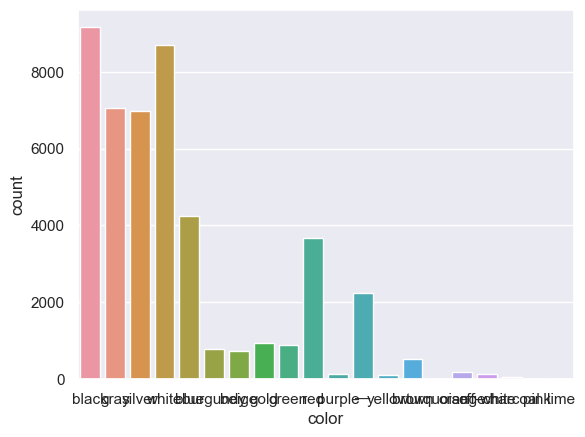

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

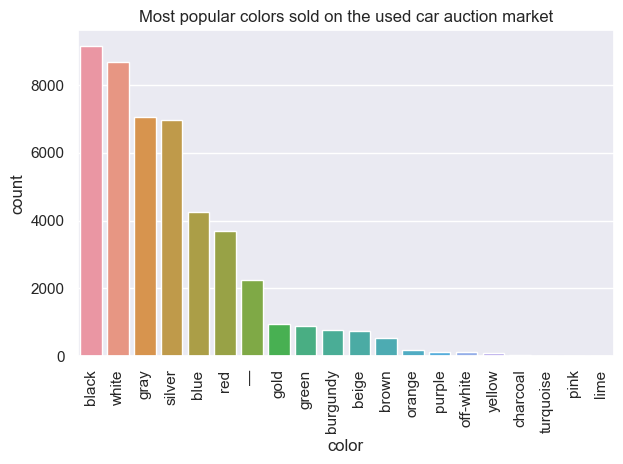

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

To check the most popular car brands we needed to have count so we implemented the countplot to show the selling price against the make column so we grouped by and sort them and implemented the countplot code

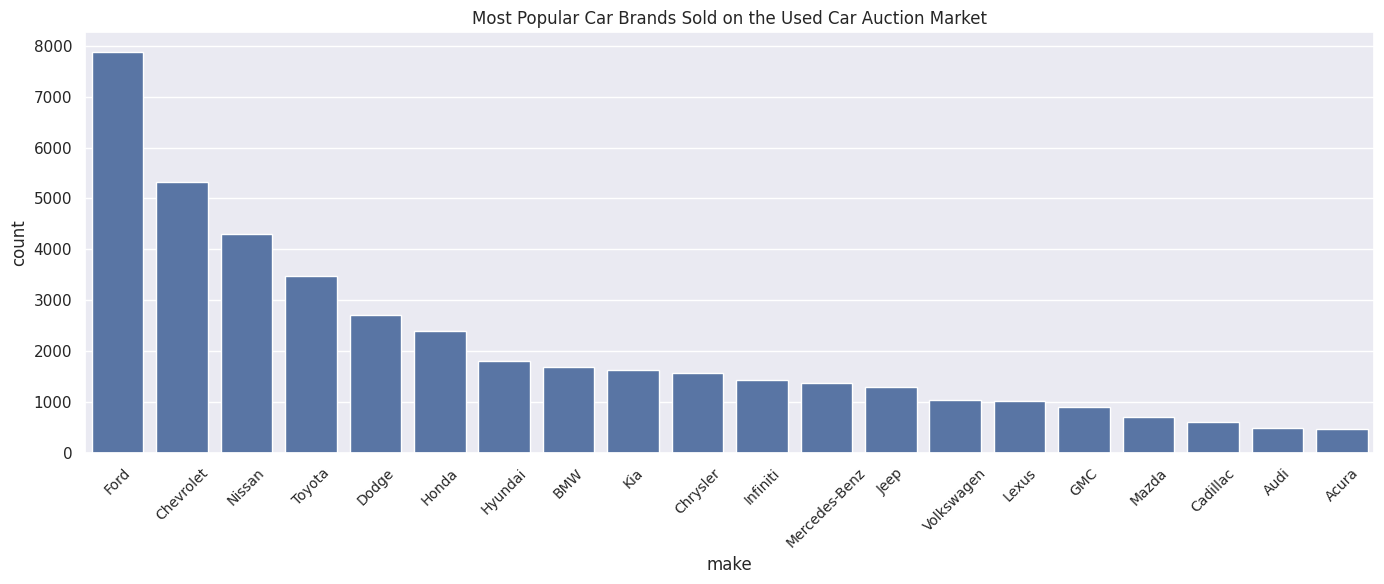

In [ ]:
# Group by car brand (make), count the occurrences, and sort them in descending order
large_to_small_brands = df.groupby('make').size().sort_values(ascending=False)

# Create a count plot for the most popular car brands
plt.figure(figsize=(14, 6))  # Increase the figure size
sns.countplot(x='make', data=df, order=large_to_small_brands.index[:20]).set(title='Most Popular Car Brands Sold on the Used Car Auction Market')  # Show top 20 brands

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size
plt.tight_layout()
plt.show()


**Answer for Q1**: Your answer here

The most popular car brands based on this graph as they have the highest count are:
1-FORD
2-CHEVROLET
3-NISSAN

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

here we are doing barplot between transmission and selling price to show relation with them

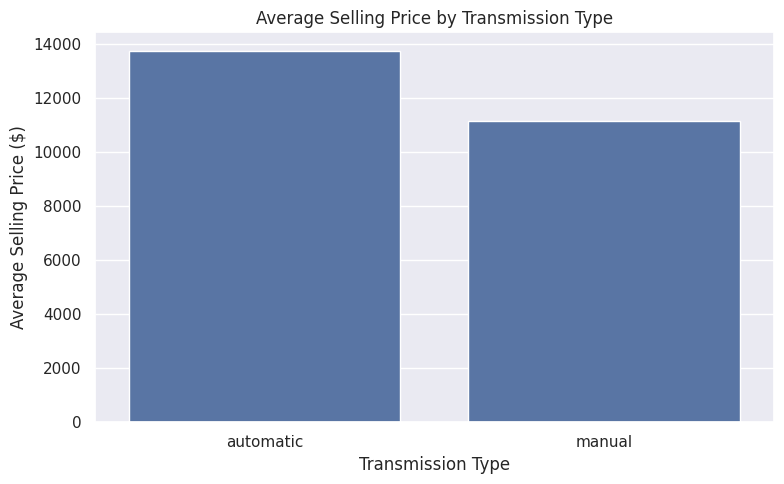

In [ ]:
mean_prices = df.groupby('transmission')['sellingprice'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='transmission', y='sellingprice', data=mean_prices)

# Set title and labels
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price ($)')
plt.tight_layout()
plt.show()

### ANSWER FOR QUESTION 2:

On average, automatic cars command a higher selling price compared to manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

Here we did boxplot to try and figure the widest distribution and expensive so after doing the boxplot we wanted to get the mean and standard deviation to answer the questions needed because standard deviation will answer the widest distribution question while the mean answered the most expensive question

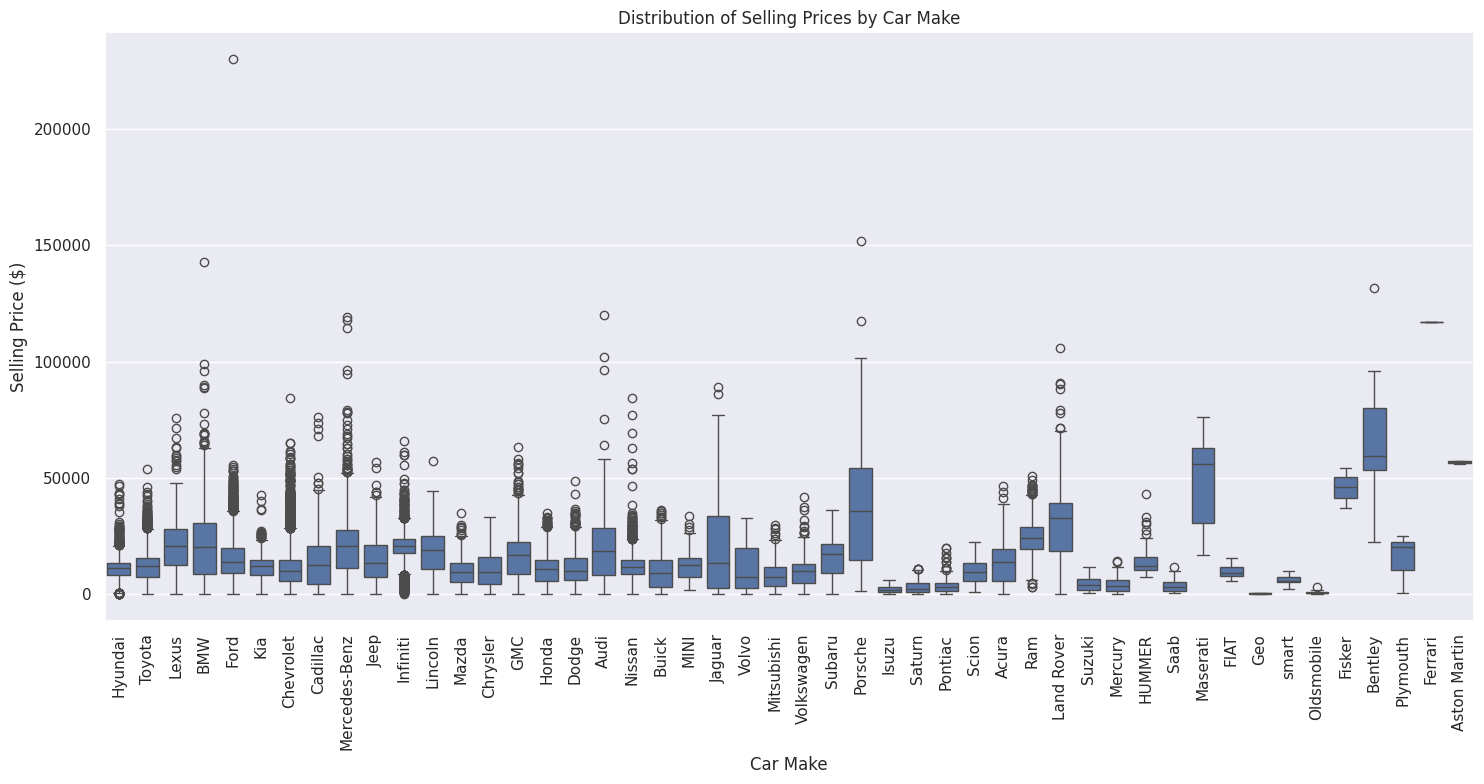

Mean Selling Prices by Car Make:
make
Acura             13730.672269
Aston Martin      56750.000000
Audi              20222.680412
BMW               21492.917262
Bentley           67781.250000
Buick             10220.719486
Cadillac          14383.546205
Chevrolet         11725.811725
Chrysler          10258.862069
Dodge             10968.062546
FIAT               9687.053571
Ferrari          117000.000000
Fisker            45833.333333
Ford              14849.163385
GMC               16915.261931
Geo                 400.000000
HUMMER            14249.404762
Honda             11011.937162
Hyundai           11138.048306
Infiniti          20221.738558
Isuzu              2373.684211
Jaguar            20570.901639
Jeep              14819.550958
Kia               11615.928005
Land Rover        31959.090909
Lexus             20674.609375
Lincoln           18137.310722
MINI              12163.148789
Maserati          48450.000000
Mazda             10248.329529
Mercedes-Benz     21229.722909
M

In [ ]:
# Create a box plot showing the distribution of selling prices by car make
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, y="sellingprice", x="make")
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Calculate the mean and standard deviation for each car make
mean_sellingprice = df.groupby('make')['sellingprice'].mean()
std_sellingprice = df.groupby('make')['sellingprice'].std()

# Print the mean and standard deviation for each car make
print("Mean Selling Prices by Car Make:")
print(mean_sellingprice)
print("\nStandard Deviation of Selling Prices by Car Make:")
print(std_sellingprice)

**Answer for Q3**: Your answer here

From the box plot provided:

	•	Widest distribution of selling prices:
	1.	Bentley
	2.	Porsche

These makes show a wide range between their lower and upper quartiles, along with significant outliers.

	•	Most expensive car makes:
	1.	Ferrari
	2.	Bentley



**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

The scatter plot with fit line is the best thing to try and estimate the correlation as correlation is estimated with the line so here we did the line of code for scatter plot and for the best  fit based on the seaborn examples.

<ipython-input-21-593ced5225a6>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='odometer', y='sellingprice', data=df, palette='purple', s=100)


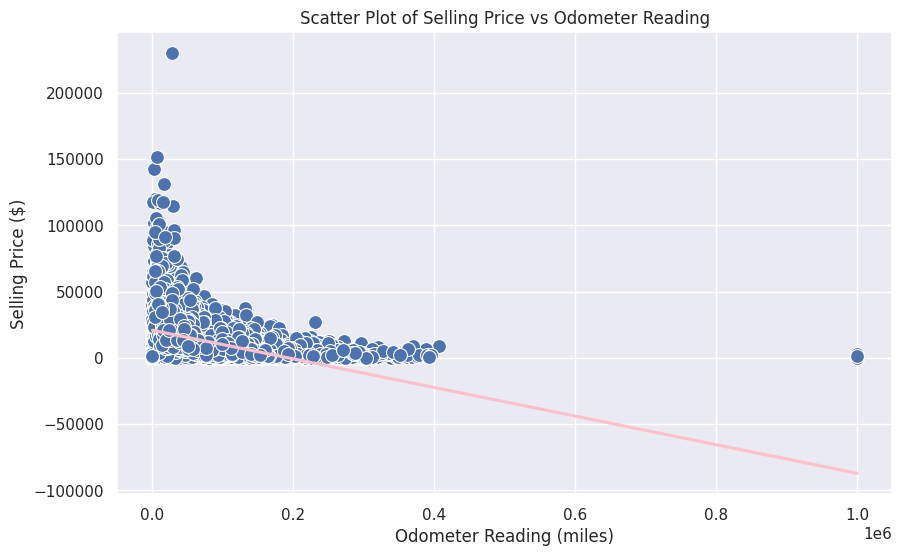

Correlation Coefficient: -0.5808998783726378


In [ ]:
# Create a figure
plt.figure(figsize=(10, 6))

# Scatter plot of Odometer vs Selling Price
sns.scatterplot(x='odometer', y='sellingprice', data=df, palette='purple', s=100)

# Add a line of best fit
sns.regplot(x='odometer', y='sellingprice', data=df, scatter=False, color='pink', ci=None)

# Set titles and labels
plt.title('Scatter Plot of Selling Price vs Odometer Reading')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price ($)')

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = df['odometer'].corr(df['sellingprice'])
print(f'Correlation Coefficient: {correlation}')


**Answer for Q4**: Your answer here

The correlation coefficient of -0.5809 indicates a moderate negative correlation between odometer reading and selling price. This means that as the odometer reading increases, the selling price tends to decrease.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

same was done here but for the columns condition and selling price as selling price is dependent on condition so we did scatter plot first then best fit line to show a correlation between them and the correlation's answer is shown below the table for better understanding and explaining the strength too.

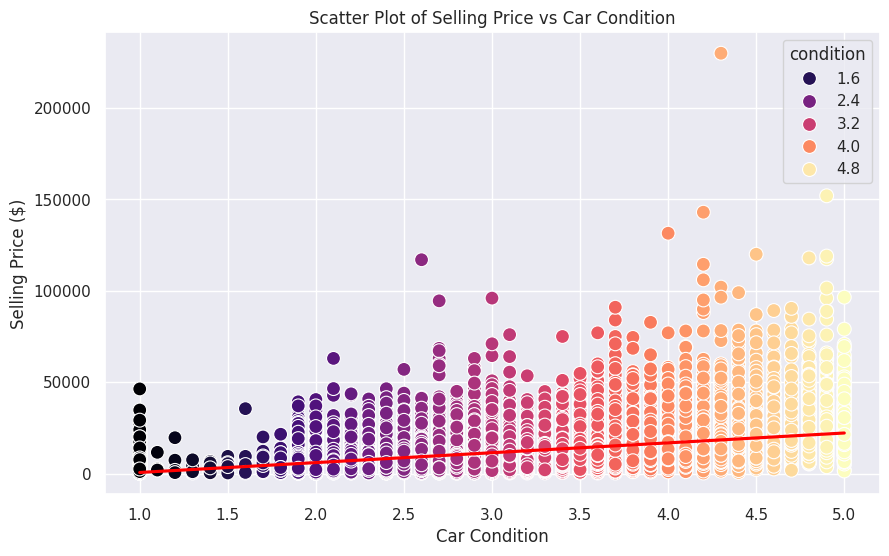

Correlation Coefficient: 0.5291410183967024


In [ ]:
# Create a figure
plt.figure(figsize=(10, 6))

# Scatter plot of Condition vs Selling Price
sns.scatterplot(x='condition', y='sellingprice', data=df, palette='magma', hue='condition', s=100)

# Add a line of best fit
sns.regplot(x='condition', y='sellingprice', data=df, scatter=False, color='red', ci=None)

# Set titles and labels
plt.title('Scatter Plot of Selling Price vs Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Selling Price ($)')

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = df['condition'].corr(df['sellingprice'])
print(f'Correlation Coefficient: {correlation}')

**Answer for Q5**: Your answer here

The correlation between the odometer reading and the car's selling price is moderate(strength) and positive (correlation coefficient = 0.529). This suggests that, generally, as condition increases, the selling price tends to increase.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

here we did barplot between selling price and body  so we grouped them,sorted them and then did the barplot inorder to answer the questions.

<ipython-input-23-21845bac84bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='body', y='sellingprice', data=mean_prices, palette='magma')


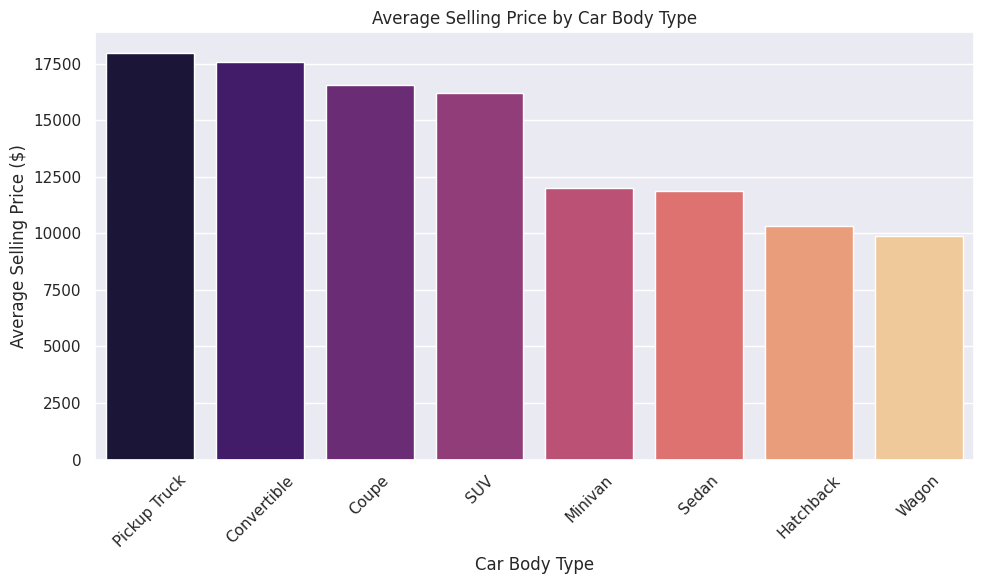

In [ ]:
# Group by body type and calculate the mean selling price
mean_prices = df.groupby('body')['sellingprice'].mean().reset_index()

# Sort the values to rank them
mean_prices = mean_prices.sort_values(by='sellingprice', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='body', y='sellingprice', data=mean_prices, palette='magma')

# Set title and labels
plt.title('Average Selling Price by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




**Answer for Q6**: Your answer here

Yes, there are significant differences in the average (mean) selling price of cars based on their body type.The ranking of the average selling prices for each body type is as follows from most expensive to least expensive:
1-Pickup Truck (Most Expensive)
2-Convertible
3-Coupe
4-SUV
5-Minivan
6-Sedan
7-Hatchback
8-Wagon (Least Expensive)



## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

The categorical columns we chose that we found that were suitable and relevent the modelling step were model,transmission,make and body. so here we did One-Hot encoding to change these columns into numeric values so that we can implement the linear regression.

In [ ]:
# Categorical columns to encode
categorical_columns = ['body', 'model', 'transmission', 'make']

# Apply one-hot encoding to the specified columns
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,  # Avoid dummy variable trap
                           dtype='int8')     # Optimize memory usage with int8

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n', df.columns.values)
print('\nNumber of rows and columns in the dataset before encoding:', df.shape)
print('\nColumns in data frame after encoding dummy variable:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset after encoding:', df_encode.shape)




Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'state' 'condition'
 'odometer' 'color' 'interior' 'seller' 'sellingprice']

Number of rows and columns in the dataset before encoding: (46578, 13)

Columns in data frame after encoding dummy variable:
 ['year' 'trim' 'state' 'condition' 'odometer' 'color' 'interior' 'seller'
 'sellingprice' 'body_Coupe' 'body_Hatchback' 'body_Minivan'
 'body_Pickup Truck' 'body_SUV' 'body_Sedan' 'body_Wagon' 'model_1500'
 'model_190-Class' 'model_2 Series' 'model_200' 'model_200SX' 'model_2500'
 'model_3' 'model_3 Series' 'model_3 Series Gran Turismo' 'model_300'
 'model_300M' 'model_3500' 'model_350Z' 'model_370Z' 'model_4 Series'
 'model_4 Series Gran Coupe' 'model_4Runner' 'model_5 Series'
 'model_5 Series Gran Turismo' 'model_500' 'model_500L' 'model_6'
 'model_6 Series' 'model_6 Series Gran Coupe' 'model_626' 'model_7 Series'
 'model_850' 'model_9-3' 'model_9-5' 'model_9-7X' 'model_911' 'model_A3'
 'model_A4' 'mo

This to show the first 5 rows to make sure that encoding was done as you can see here body coupe for example has now numeric values.

In [ ]:
df_encode.head()

,year,trim,state,condition,odometer,color,interior,seller,sellingprice,body_Coupe,...,make_Ram,make_Saab,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart
0,2013,GLS,MA,3.9,50404,black,gray,The Hertz Corporation,10900,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,SR5,FL,4.9,17846,gray,black,Award Auto Sales And Leasing Inc,29900,0,...,0,0,0,0,0,0,1,0,0,0
2,2012,Base,FL,4.1,21122,silver,black,Lexus Financial Services,24200,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,4.4i,FL,1.9,145303,black,black,Peddle Llc,3200,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,E-250,WA,4.9,6714,white,gray,U-Haul,22100,0,...,0,0,0,0,0,0,0,0,0,0



Since the Categorical columns have been already encoded using One-hot encoding to 0s and 1s, we need now to scale the Numerical ones. Here, we will only normalize the independent numeric variables so that they all are within 0s and 1s to match body, make,model, and transimission columns after one-hot encoding.

In [ ]:
# Specify the numeric columns for normalization
numerical_columns = ['year', 'condition', 'odometer']

# Apply Min-Max normalization
df_encode[numerical_columns] = (
    df_encode[numerical_columns] - df_encode[numerical_columns].min()
) / (
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

# Display the first few rows of the updated DataFrame
df_encode.head()


,year,trim,state,condition,odometer,color,interior,seller,sellingprice,body_Coupe,...,make_Ram,make_Saab,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart
0,0.92,GLS,MA,0.725,0.050403,black,gray,The Hertz Corporation,10900,0,...,0,0,0,0,0,0,0,0,0,0
1,0.96,SR5,FL,0.975,0.017845,gray,black,Award Auto Sales And Leasing Inc,29900,0,...,0,0,0,0,0,0,1,0,0,0
2,0.88,Base,FL,0.775,0.021121,silver,black,Lexus Financial Services,24200,0,...,0,0,0,0,0,0,0,0,0,0
3,0.48,4.4i,FL,0.225,0.145302,black,black,Peddle Llc,3200,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,E-250,WA,0.975,0.006713,white,gray,U-Haul,22100,0,...,0,0,0,0,0,0,0,0,0,0


we'll split the data we have into a training dataset (used for training the model) and a testing dataset (used to evaluate the model's performance). but here also we dropped the independent variables that we don't want to use which are trim,state,color,interior and of course the sellingprice as it is our dependent variable then the rest of the columns were used as the independent variables then we did splitting based on these variables.

In [ ]:
from sklearn.model_selection import train_test_split
# Define columns to drop (make sure these names match exactly with the output above)
columns_to_drop = ['selling price', 'trim', 'state', 'seller', 'color', 'interior']

# Create independent variables by dropping the specified columns
# You can add errors='ignore' to avoid KeyErrors if some columns are not found
x = df_encode.drop(columns=columns_to_drop, errors='ignore')

# Define dependent variable
y = df_encode['sellingprice']  # This remains the same

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Print the sizes of the training and testing datasets
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

we imported sklearn's LinearRegression model and fit (i.e. train) the model to our training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
lin_reg = LinearRegression()

# Fit the model using the training data
lin_reg.fit(x_train, y_train)





LinearRegression()

this code creates a DataFrame that summarizes the parameters (coefficients) of a linear regression model we trained and inspect the parameters of the fitted linear regression model

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter': parameter, 'column': columns, 'theta_value': sk_theta})
parameter_df



,parameter,column,theta_value
0,theta_0,y-intersect,-1.757829e-03
1,theta_1,year,2.513754e-11
2,theta_2,condition,-1.675438e-12
3,theta_3,odometer,1.912704e-11
4,theta_4,sellingprice,1.000000e+00
...,...,...,...
702,theta_702,make_Suzuki,1.527997e-03
703,theta_703,make_Toyota,1.396090e-03
704,theta_704,make_Volkswagen,1.299113e-03
705,theta_705,make_Volvo,1.563093e-03


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

here we are getting rsme and r squared

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation



# If you are using a cloud Python notebook, run the below RMSE line
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test, y_test)

print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)


The root mean square error (RMSE) is:  5.431603663974886e-05
R^2 obtained is: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

### Model Evaluation Summary:

- **RMSE**: `5.4316e-05` (very low prediction error).
- **R²**: 1.0 meaning the model perfectly explains the variance in the target variable.

- **Findings**:
  - The model fits the data perfectly, but this might suggest overfitting.
  - It could struggle with new, unseen data.

- **Recommendations**:
  - Perform cross-validation to ensure the model generalizes well.
  - Test on larger, more diverse datasets for reliability.

n summary, with an R² of 1.0, the model would still be useful for a used car dealership

# BONUS

I first calculate the IQR to find the lower and upper bounds for outliers in the sellingprice column, then I create a new DataFrame that removes any rows with sellingprice values outside these bounds to get rid of the outliers.

In [ ]:
# Calculate the IQR
Q1 = df_encode['sellingprice'].quantile(0.25)
Q3 = df_encode['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df_no_outliers = df_encode[(df_encode['sellingprice'] >= lower_bound) & (df_encode['sellingprice'] <= upper_bound)]


This code helps me get my dataset ready for training a machine learning model by dropping some columns and splitting the data into training and testing sets. First, I list the columns I don’t need, then I create the independent variables (x_no_outliers) by removing those columns and keep sellingprice as the dependent variable (y_no_outliers). Finally, I use train_test_split to split my data into training and testing sets, making sure that 20% is set aside for testing and keeping the random state the same for consistency.








In [ ]:
from sklearn.model_selection import train_test_split
# Define columns to drop (make sure these names match exactly with the output above)
columns_to_drop = ['selling price', 'trim', 'state', 'seller', 'color', 'interior']

# Create independent variables by dropping the specified columns
# You can add errors='ignore' to avoid KeyErrors if some columns are not found
x_no_outliers = df_no_outliers.drop(columns=columns_to_drop, errors='ignore')
y_no_outliers = df_no_outliers['sellingprice']

# Split the dataset into training and testing sets
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    x_no_outliers, y_no_outliers, test_size=0.2, random_state=23
)


This code sets up and trains a new linear regression model without the outliers. I first create an instance of the LinearRegression class, then I use the fit method to train the model using the training data I prepared earlier (x_train_no_outliers for the features and y_train_no_outliers for the target variable).

In [ ]:
from sklearn.linear_model import LinearRegression

# Define and train the new linear regression model
lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(x_train_no_outliers, y_train_no_outliers)


LinearRegression()

In [ ]:
# Predict the values on the test set
y_pred_no_outliers = lin_reg_no_outliers.predict(x_test_no_outliers)

# Calculate RMSE and R² for the model without outliers
from sklearn.metrics import mean_squared_error

rmse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers, squared=False)
R_square_no_outliers = lin_reg_no_outliers.score(x_test_no_outliers, y_test_no_outliers)

print('The root mean square error (RMSE) without outliers is: ', rmse_no_outliers)
print('R^2 obtained without outliers is:', R_square_no_outliers)


The root mean square error (RMSE) without outliers is:  1.6999910937188085e-05
R^2 obtained without outliers is: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
